In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Varying D

In [43]:
res = pd.read_csv("resFIX_R_2.csv")
res["R/D"] = res["R"]/res["D"]
res["error"] = abs(res["Analytic"] - res["Numerical"])
res["error%"] = res["error"]/res["Analytic"] * 100
res["D/R"] = 1/res["R/D"]

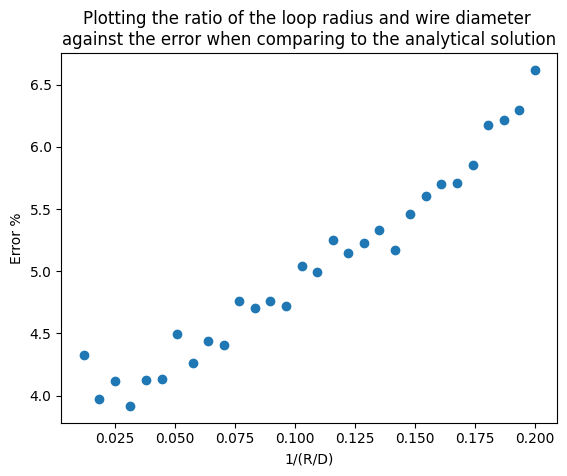

In [46]:
plt.scatter(res["D/R"],res["error%"])
plt.ylabel("Error %")
plt.xlabel("1/(R/D)")
plt.title("Plotting the ratio of the loop radius and wire diameter \nagainst the error when comparing to the analytical solution")
plt.show()

## Varying R

In [42]:
res = pd.read_csv("resFIX_D.csv")
res["R/D"] = res["R"]/res["D"]
res["error"] = abs(res["Analytic"] - res["Numerical"])
res["error%"] = res["error"]/res["Analytic"] * 100
# res

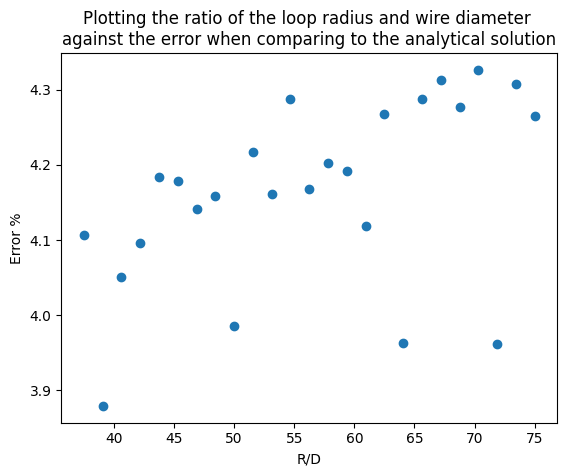

In [41]:
plt.scatter(res["R/D"],res["error%"])
plt.ylabel("Error %")
plt.xlabel("R/D")
plt.title("Plotting the ratio of the loop radius and wire diameter \nagainst the error when comparing to the analytical solution")
plt.show()

## Surface area mesh error 

In [60]:
res = pd.read_csv("resFIX_D_AreaErr.csv")
res["R/D"] = res["R"]/res["D"]
res["error"] = abs(res["Analytic"] - res["Numerical"])
res["error%"] = res["error"]/res["Analytic"] * 100
res[" Numerical Area"] = res[" Numerical Area"]*1e-12
res["Area Error"] = abs(res[" Numerical Area"] - res["Analytic Area"])
res["%AreaArea"] = res["Area Error"]/res["Analytic Area"]
res

,R,D,Analytic,Numerical,Analytic Area,Numerical Area,R/D,error,error%,Area Error,%AreaArea
0,0.000015,4.000000e-07,3.970394e-10,4.133460e-10,1.184353e-10,1.183170e-10,37.500,1.630662e-11,4.107052,1.182528e-13,0.000998
1,0.000019,4.000000e-07,4.962992e-10,5.168500e-10,1.480441e-10,1.478560e-10,46.875,2.055077e-11,4.140802,1.880660e-13,0.001270
2,0.000023,4.000000e-07,5.955591e-10,6.203790e-10,1.776529e-10,1.774620e-10,56.250,2.481992e-11,4.167500,1.908792e-13,0.001074
3,0.000026,4.000000e-07,6.948189e-10,7.246170e-10,2.072617e-10,2.073580e-10,65.625,2.979808e-11,4.288611,9.630758e-14,0.000465
4,0.000030,4.000000e-07,7.940788e-10,8.279500e-10,2.368705e-10,2.369100e-10,75.000,3.387123e-11,4.265475,3.949437e-14,0.000167


## Parralell sim

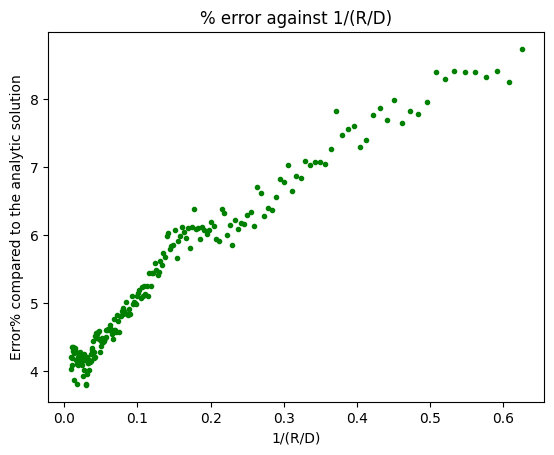

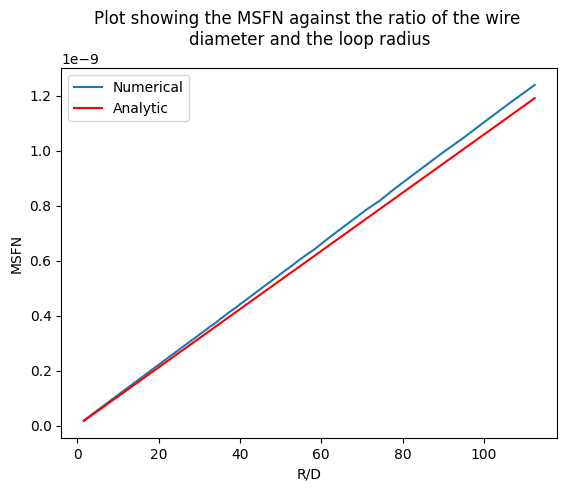

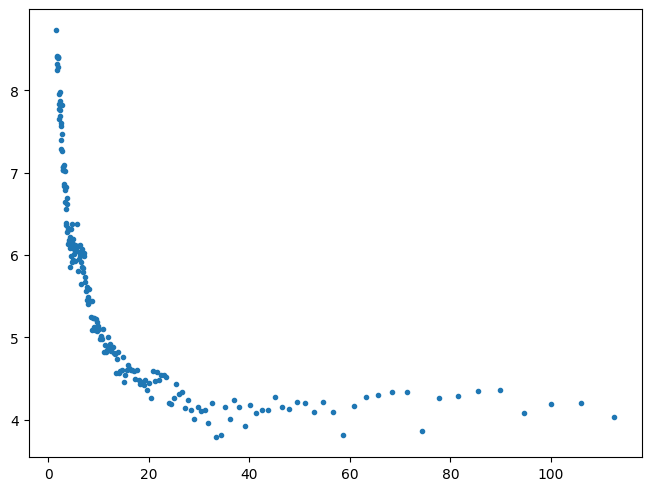

In [26]:
import os

simRange = range(1,201)
df = pd.DataFrame()

for i in simRange:
    temp = pd.read_csv(f"./sim{i}/resPARR_SIM.csv")
    df = pd.concat([df,temp],ignore_index=True)

df["R/D"] = df["R"]/df["D"]
df["error"] = abs(df["Analytic"] - df["Numerical"])
df["error%"] = df["error"]/df["Analytic"] * 100
df[" Numerical Area"] = df[" Numerical Area"]*1e-12
df["Area Error"] = abs(df[" Numerical Area"] - df["Analytic Area"])
df["%AreaError"] = df["Area Error"]/df["Analytic Area"] * 100


plt.scatter(1/df["R/D"],df["error%"],marker='.',color='green')
plt.title("% error against 1/(R/D)")
plt.ylabel("Error% compared to the analytic solution")
plt.xlabel("1/(R/D)")
plt.show()

fig, ax = plt.subplots()

ax.plot(df["R/D"],df["Numerical"],label="Inline label")

ax.plot(df["R/D"],df["Analytic"],color='red')

ax.legend(['Numerical', 'Analytic'])
plt.title("Plot showing the MSFN against the ratio of the wire \ndiameter and the loop radius")
plt.ylabel('MSFN')
plt.xlabel("R/D")
plt.show()

fig, ax1 = plt.subplots(layout='constrained')
ax1.scatter(df['R/D'],df['error%'],marker='.')
plt.show()